In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Apr_17_19:36:51_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.5, V12.5.40
Build cuda_12.5.r12.5/compiler.34177558_0


[0.   0.15 0.3  0.45 0.6 ]
[1.   1.15 1.3  1.45 1.6 ]
[2.   2.15 2.3  2.45 2.6 ]
[3.   3.15 3.3  3.45 3.6 ]
[4.   4.15 4.3  4.45 4.6 ]


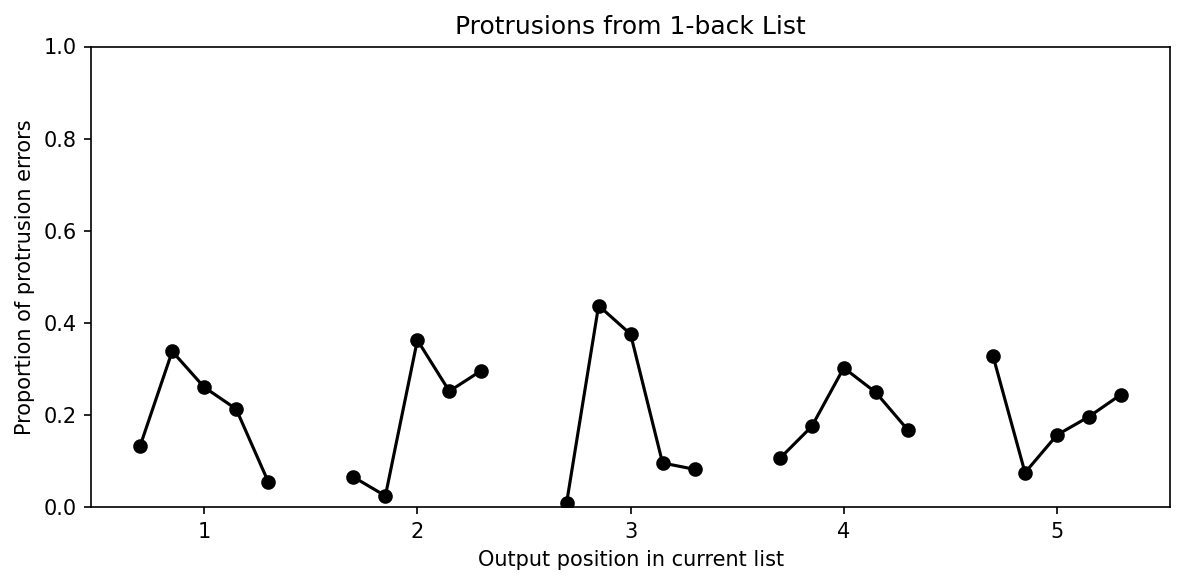

[0.   0.15 0.3  0.45 0.6 ]
[1.   1.15 1.3  1.45 1.6 ]
[2.   2.15 2.3  2.45 2.6 ]
[3.   3.15 3.3  3.45 3.6 ]
[4.   4.15 4.3  4.45 4.6 ]


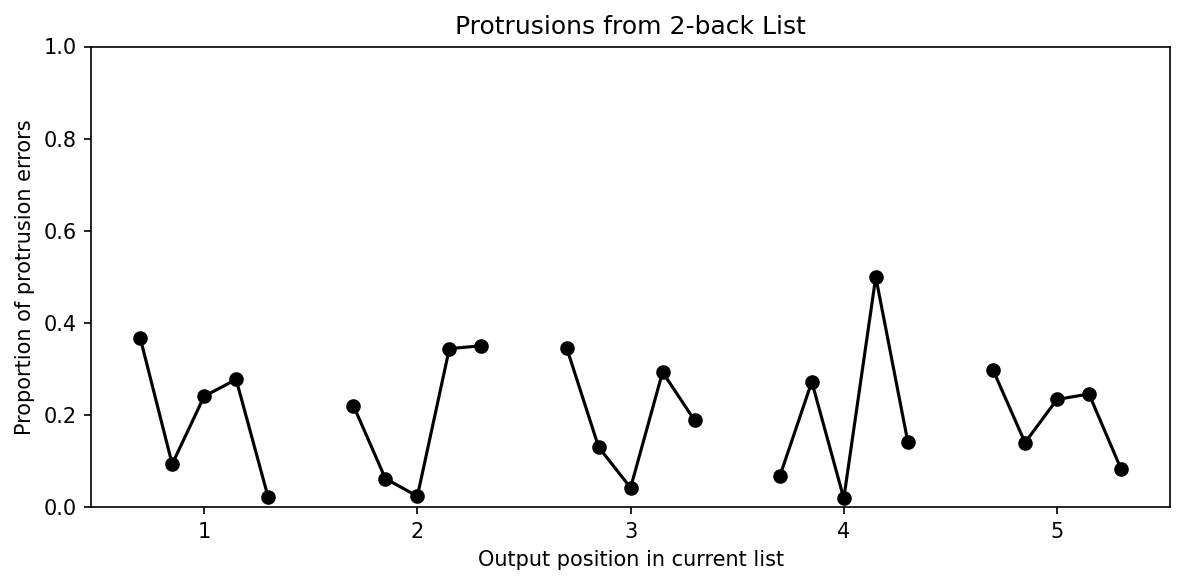

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Dummy data (for illustration) ---
memory_num = 5
np.random.seed(42)
protrusions1 = np.random.rand(memory_num, memory_num)
protrusions1 = protrusions1 / protrusions1.sum(axis=1, keepdims=True)
protrusions2 = np.random.rand(memory_num, memory_num)
protrusions2 = protrusions2 / protrusions2.sum(axis=1, keepdims=True)

def plot_protrusion_bars(protrusions, title):
    memory_num = protrusions.shape[0]
    x = np.arange(memory_num)  # output positions (groups)
    bar_width = 0.15
    cmap = plt.get_cmap("tab10")

    plt.figure(figsize=(8, 4), dpi=150)

    for out_pos in range(memory_num):
        # each output position is one group of bars
        x_bar = x[out_pos] + np.arange(memory_num) * bar_width
        heights = protrusions[out_pos, :]

  

        # connect the tops of bars *within this group*
        print(x_bar)
        plt.plot(
            x_bar,
            heights,
            color='k',
            marker='o',
            linestyle='-'
        )

    # center x-axis ticks
    plt.xticks(x + bar_width * (memory_num - 1) / 2, np.arange(1, memory_num + 1))
    plt.xlabel("Output position in current list")
    plt.ylabel("Proportion of protrusion errors")
    plt.title(title)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# --- Plot both 1-back and 2-back protrusions ---
plot_protrusion_bars(protrusions1, "Protrusions from 1-back List")
plot_protrusion_bars(protrusions2, "Protrusions from 2-back List")


In [6]:
memory_num = 8
np.arange(memory_num)[1] + np.arange(memory_num) * 0.15

array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05])

In [9]:
np.random.seed(42)
protrusion_list = np.random.rand(memory_num, memory_num)
protrusion_list = protrusion_list / protrusion_list.sum(axis=1, keepdims=True)
protrusion_list[1,:]

array([0.16203901, 0.19087093, 0.00554884, 0.26145285, 0.22439663,
       0.057239  , 0.04901348, 0.04943927])